# Notebook: Support Vector Machines (SVM)
Este notebook contém explicações e código passo a passo.

## Passo 1 — Intuição do SVM

In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


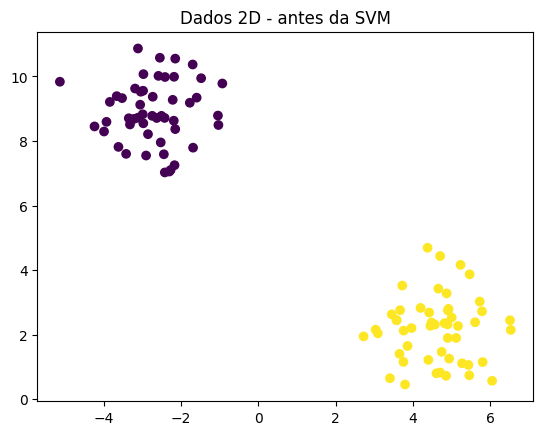

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
X, y = datasets.make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Dados 2D - antes da SVM')
plt.show()

## Passo 2 — Hiperplano e suporte-vetores

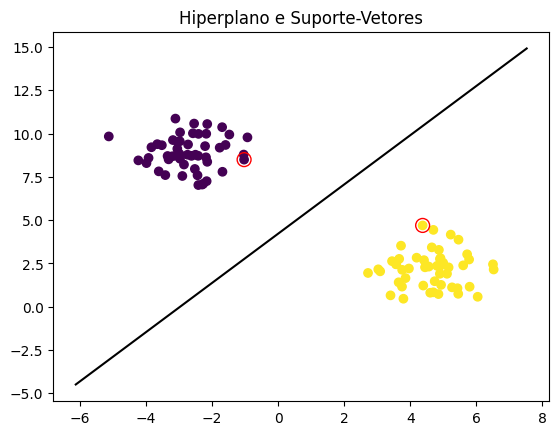

In [9]:
import numpy as np
w = model.coef_[0]
b = model.intercept_[0]
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
yy = -(w[0]/w[1])*xx - b/w[1]
plt.plot(xx, yy, 'k-')
plt.scatter(X[:,0], X[:,1], c=y)
sv = model.support_vectors_
plt.scatter(sv[:,0], sv[:,1], s=100, facecolors='none', edgecolors='r')
plt.title('Hiperplano e Suporte-Vetores')
plt.show()

## Passo 3 — Teste de C

In [10]:
for C in [0.1, 1, 100]:
    m = SVC(kernel='linear', C=C).fit(X, y)
    print('C=', C, ' - nº support vectors:', len(m.support_))

C= 0.1  - nº support vectors: 2
C= 1  - nº support vectors: 2
C= 100  - nº support vectors: 2


## Passo 4 — Kernels

In [11]:
for kernel in ['linear', 'rbf', 'poly']:
    m = SVC(kernel=kernel, C=1.0).fit(X, y)
    print(kernel, '-> score:', m.score(X, y))

linear -> score: 1.0
rbf -> score: 1.0
poly -> score: 1.0


## Passo 5 — Pipeline com StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf'))])
pipeline.fit(X_train, y_train)
print('Test score:', pipeline.score(X_test, y_test))

Test score: 1.0


## Passo 6 — Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 0.01, 0.001], 'svc__kernel': ['rbf', 'linear']}
pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print('Melhor score CV:', grid.best_score_)
print('Melhor params:', grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhor score CV: 1.0
Melhor params: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


   feature1  feature2  label
0 -0.375312  0.213451      1
1 -0.067487  1.006769      0
2 -0.343097  0.024870      1
3 -0.611725 -0.631407      0
4 -0.789013  0.684519      0


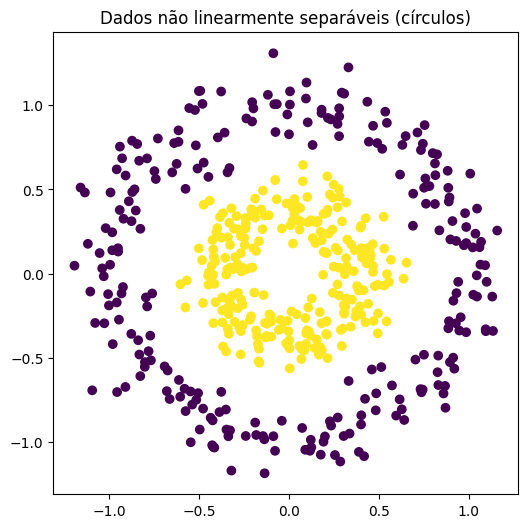

Acurácia em dados não linearmente separáveis: 1.0


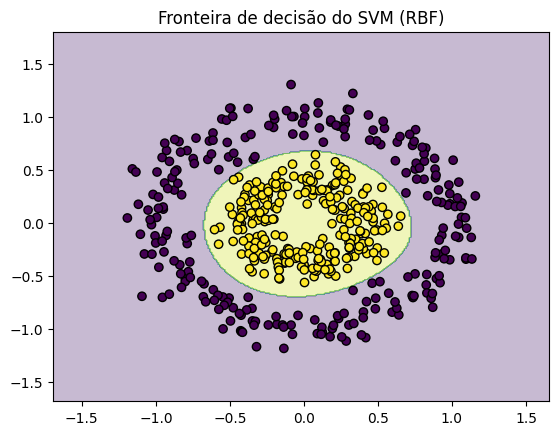

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# ===========================
# 1. Gerar dados NÃO linearmente separáveis
# ===========================
X, y = make_circles(n_samples=500, factor=0.4, noise=0.1, random_state=42)

# Criar DataFrame
df = pd.DataFrame({
    "feature1": X[:,0],
    "feature2": X[:,1],
    "label": y
})

print(df.head())

# Visualizar os dados
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Dados não linearmente separáveis (círculos)")
plt.show()

# ===========================
# 2. Treinar um SVM com kernel RBF (necessário aqui)
# ===========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1, gamma="scale"))
])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)

print("Acurácia em dados não linearmente separáveis:", score)

# ===========================
# 3. Plotar fronteira de decisão
# ===========================
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
    plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", edgecolors="k")
    plt.title("Fronteira de decisão do SVM (RBF)")
    plt.show()

plot_decision_boundary(pipeline, X, y)

## Dataframe tudo misturado 

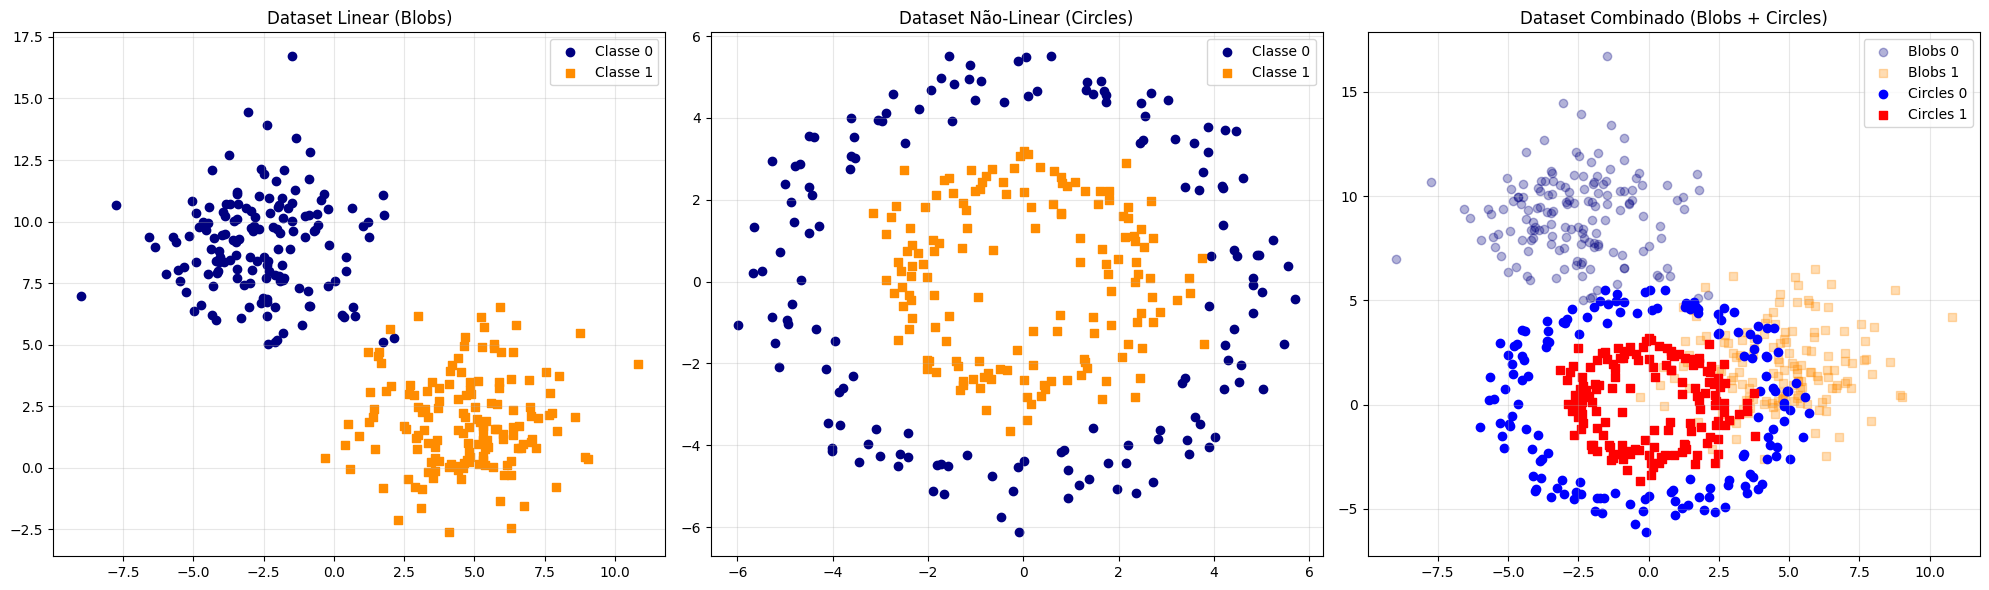

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# ==========================================
# 1. Geração e Combinação dos Dados
# ==========================================

# Gerar dados lineares (Blobs)
# cluster_std controla a dispersão dos pontos
X_blobs, y_blobs = datasets.make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=2.0)
df_blobs = pd.DataFrame(X_blobs, columns=['x1', 'x2'])
df_blobs['label'] = y_blobs
df_blobs['dataset_type'] = 'Blobs (Linear)'

# Gerar dados não lineares (Circles)
# factor controla o tamanho do círculo interno em relação ao externo
X_circles, y_circles = datasets.make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

# Ajuste de escala: Multiplico por 5 para os círculos não ficarem 
# muito pequenos visualmente em comparação aos blobs
X_circles = X_circles * 5 

df_circles = pd.DataFrame(X_circles, columns=['x1', 'x2'])
df_circles['label'] = y_circles
df_circles['dataset_type'] = 'Circles (Não-Linear)'

# Juntar (concatenar) os dois DataFrames em um só
df_combined = pd.concat([df_blobs, df_circles], ignore_index=True)

# ==========================================
# 2. Plotagem dos Gráficos
# ==========================================

# Criar uma figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: Apenas Blobs
axes[0].scatter(
    df_blobs[df_blobs['label']==0]['x1'], df_blobs[df_blobs['label']==0]['x2'], 
    c='navy', marker='o', label='Classe 0'
)
axes[0].scatter(
    df_blobs[df_blobs['label']==1]['x1'], df_blobs[df_blobs['label']==1]['x2'], 
    c='darkorange', marker='s', label='Classe 1'
)
axes[0].set_title('Dataset Linear (Blobs)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Apenas Circles
axes[1].scatter(
    df_circles[df_circles['label']==0]['x1'], df_circles[df_circles['label']==0]['x2'], 
    c='navy', marker='o', label='Classe 0'
)
axes[1].scatter(
    df_circles[df_circles['label']==1]['x1'], df_circles[df_circles['label']==1]['x2'], 
    c='darkorange', marker='s', label='Classe 1'
)
axes[1].set_title('Dataset Não-Linear (Circles)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Combinado
# Plotamos os Blobs com transparência (alpha) para ver a sobreposição
axes[2].scatter(
    df_blobs[df_blobs['label']==0]['x1'], df_blobs[df_blobs['label']==0]['x2'], 
    c='navy', marker='o', alpha=0.3, label='Blobs 0'
)
axes[2].scatter(
    df_blobs[df_blobs['label']==1]['x1'], df_blobs[df_blobs['label']==1]['x2'], 
    c='darkorange', marker='s', alpha=0.3, label='Blobs 1'
)
# Plotamos os Circles
axes[2].scatter(
    df_circles[df_circles['label']==0]['x1'], df_circles[df_circles['label']==0]['x2'], 
    c='blue', marker='o', label='Circles 0'
)
axes[2].scatter(
    df_circles[df_circles['label']==1]['x1'], df_circles[df_circles['label']==1]['x2'], 
    c='red', marker='s', label='Circles 1'
)
axes[2].set_title('Dataset Combinado (Blobs + Circles)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

      feature1  feature2  label
456   0.702505 -0.862452      1
3     2.921513 -2.522103      0
530   0.299416  1.434027      1
53    0.973296 -1.036970      0
424   2.390858  2.306619      1
459   3.939341 -0.545659      0
744   3.212538 -0.796470      1
1125  3.167768 -0.364415      1
97    3.971696 -0.523080      1
479   2.446972 -1.670152      1


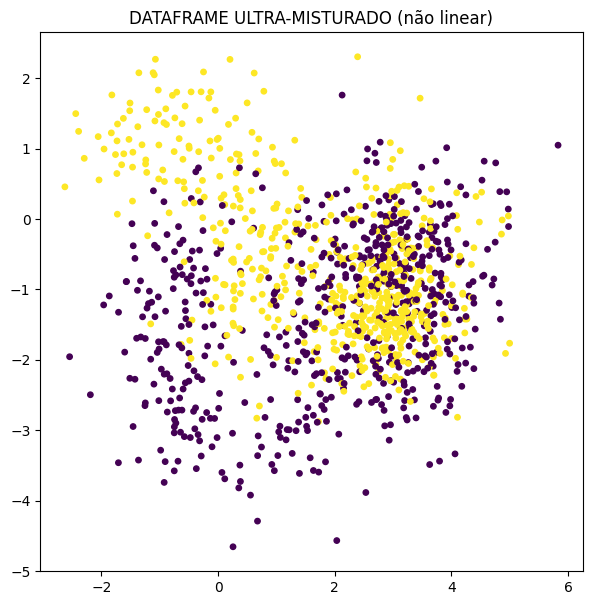

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# ===========================
# 1. Criar vários padrões diferentes
# ===========================

# Circles
from sklearn.datasets import make_circles, make_moons

X1, y1 = make_circles(n_samples=400, factor=0.25, noise=0.2, random_state=42)

# Moons
X2, y2 = make_moons(n_samples=400, noise=0.25, random_state=12)

# Clusteres gaussianos
X3 = np.random.randn(400, 2) * 1.2
y3 = np.random.randint(0, 2, 400)

# ===========================
# 2. Misturar transformações aleatórias
# ===========================

def random_transform(X):
    # Rotação aleatória
    angle = np.random.uniform(0, 2*np.pi)
    R = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle),  np.cos(angle)]
    ])
    X = X @ R.T
    
    # Esticar/Compressão
    stretch = np.random.uniform(0.5, 2.0)
    X *= stretch
    
    # Ruído forte
    X += np.random.normal(0, 0.4, X.shape)
    
    # Translação
    X += np.random.uniform(-3, 3, (1, 2))
    
    return X

X1 = random_transform(X1)
X2 = random_transform(X2)
X3 = random_transform(X3)

# ===========================
# 3. Unir tudo e misturar mais
# ===========================

X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

# Baralhar totalmente
X, y = shuffle(X, y, random_state=99)

# ===========================
# 4. Criar DataFrame final
# ===========================

df = pd.DataFrame({
    "feature1": X[:,0],
    "feature2": X[:,1],
    "label": y
})

print(df.sample(10))

# ===========================
# 5. Visualizar (boa sorte :) )
# ===========================

plt.figure(figsize=(7,7))
plt.scatter(df["feature1"], df["feature2"], c=df["label"], cmap="viridis", s=15)
plt.title("DATAFRAME ULTRA-MISTURADO (não linear)")
plt.show()

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X_data = df[["feature1", "feature2"]].values
y_data = df["label"].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.25, random_state=42
)

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=3, gamma="scale"))
])

model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print("Acurácia do SVM no dataset ultra-misturado:", acc)

Acurácia do SVM no dataset ultra-misturado: 0.66


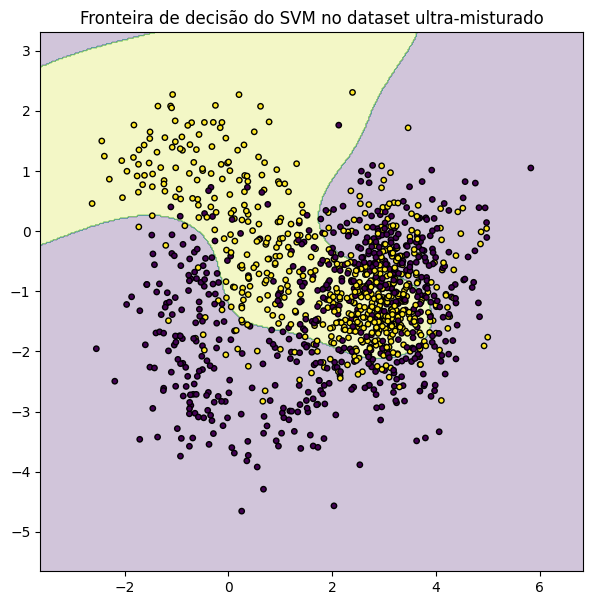

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):

    # grade de pontos
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    # pipeline: usar pipeline.predict diretamente
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot
    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap="viridis", alpha=0.25)
    plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=15, edgecolors="k")
    plt.title("Fronteira de decisão do SVM no dataset ultra-misturado")
    plt.show()

plot_decision_boundary(model, X_data, y_data)

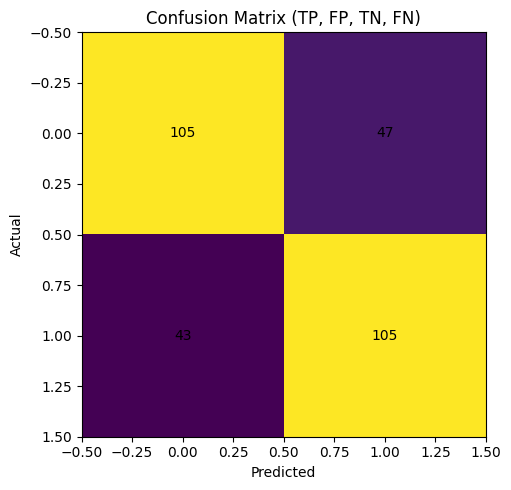

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# ==== Generate ultra-mixed dataset ====
def random_transform(X):
    angle = np.random.uniform(0, 2*np.pi)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    X = X @ R.T
    stretch = np.random.uniform(0.5, 2.0)
    X *= stretch
    X += np.random.normal(0, 0.4, X.shape)
    X += np.random.uniform(-3, 3, (1,2))
    return X

X1, y1 = make_circles(n_samples=400, factor=0.25, noise=0.2, random_state=42)
X2, y2 = make_moons(n_samples=400, noise=0.25, random_state=12)
X3 = np.random.randn(400,2) * 1.2
y3 = np.random.randint(0,2,400)

X1, X2, X3 = random_transform(X1), random_transform(X2), random_transform(X3)

X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])
X, y = shuffle(X, y, random_state=99)

# ==== Train-test split and SVM model ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=3, gamma="scale"))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ==== Confusion Matrix ====
cm = confusion_matrix(y_test, y_pred)

# ==== Plot confusion matrix ====
plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Confusion Matrix (TP, FP, TN, FN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.show()